<a href="https://colab.research.google.com/github/AcerPing/keras_yolov3_bridge_detection/blob/master/yolo_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%tensorflow_version 1.x

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
import os
import sys
FOLDER_PATH = '/content/drive/My Drive/keras_yolov3_bridge_detection'
sys.path.append(FOLDER_PATH)

In [10]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [11]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep036-loss10.231-val_loss10.506.h5'), 
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/keras_yolov3_bridge_detection/ep036-loss10.231-val_loss10.506.h5 model, anchors, and classes loaded.


/content/drive/My Drive/keras_yolov3_bridge_detection/dataset/train_img/01099.jpg
(227, 227) (416, 416)
(416, 416, 3)
Found 1 boxes for img
concrete crack 0.94 (1, 64) (226, 202)
1.377415085999985


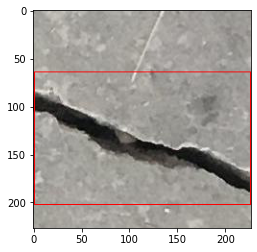

In [16]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

## Yolo pretrained COCO

In [13]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep036-loss10.231-val_loss10.506.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/keras_yolov3_bridge_detection/ep036-loss10.231-val_loss10.506.h5 model, anchors, and classes loaded.


/content/drive/My Drive/keras_yolov3_bridge_detection/testing_pictures/crack-wall-concrete-texture.jpg
(910, 607) (416, 416)
(416, 416, 3)
Found 1 boxes for img
concrete crack 0.27 (351, 0) (694, 607)
3.3261758290000216


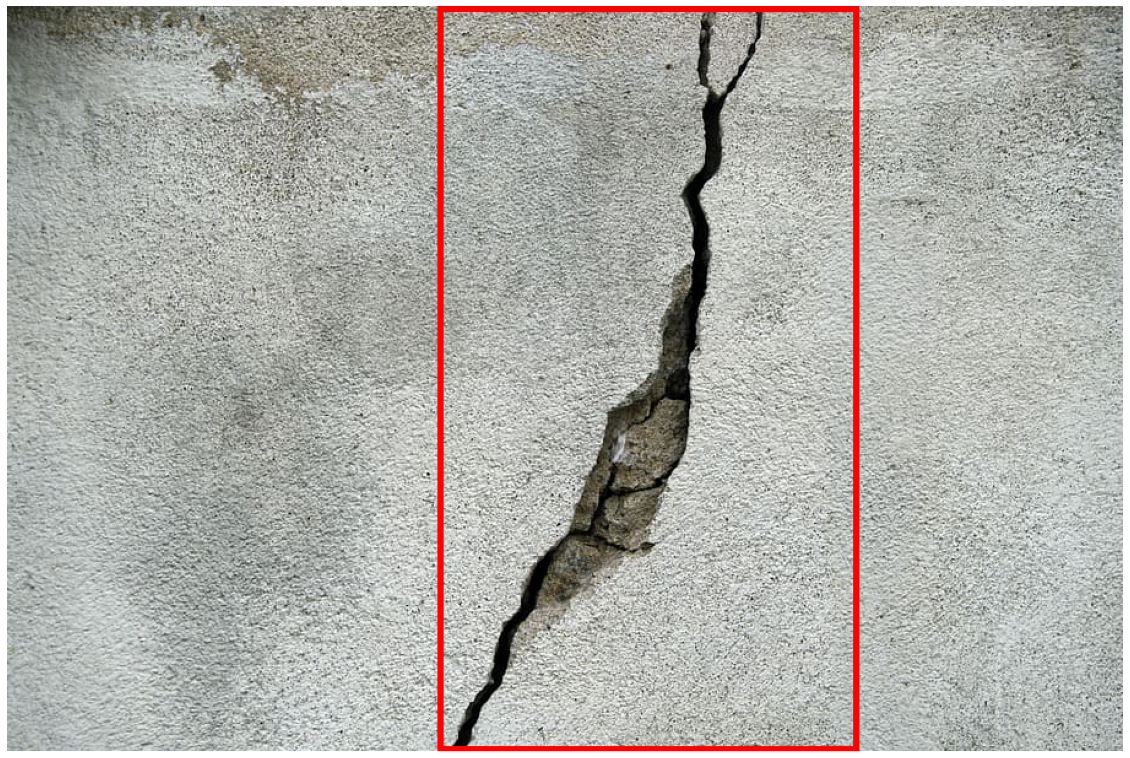

In [14]:
path = os.path.join(FOLDER_PATH, 'testing_pictures/crack-wall-concrete-texture.jpg')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(r_image)